# 1.import library

- Importing the basic librarires for building model and EDA

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




# import for prediction car price
#Importing the basic librarires for building model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer,MinMaxScaler

In [35]:
# import data
df = pd.read_csv("CarPrice_Assignment.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


# 2.Check Health Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
# check duplicates data
df.duplicated().sum()

0

In [38]:
df.symboling.astype('category').unique()

[3, 1, 2, 0, -1, -2]
Categories (6, int64): [-2, -1, 0, 1, 2, 3]

In [39]:
# check null
df.isna().sum().sum()

0

In [40]:
df_cols_cat = df.select_dtypes(include='object')
for col in df_cols_cat.drop('CarName' , axis = 1):
    print(f"Unique values in column {col} : {df_cols_cat[col].unique()}\n")

Unique values in column fueltype : ['gas' 'diesel']

Unique values in column aspiration : ['std' 'turbo']

Unique values in column doornumber : ['two' 'four']

Unique values in column carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values in column drivewheel : ['rwd' 'fwd' '4wd']

Unique values in column enginelocation : ['front' 'rear']

Unique values in column enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique values in column cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Unique values in column fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



- แสดง unique values คอลัมน์ ที่เป็น category แต่ละอัน แต่ เราไม่แสดง CarName ออกเพราะเป็นชื่อรถ

In [41]:
# ใช้ .descrbies ดูข้อมูลคร่าวๆ ก่อน EDA & Visual
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- price max : 45,400
        min : 5,118
        mean: 13,276
        การกระจายตัวเทียบระหว่าง mean , median ต่างกันพอสมควร กราฟที่ได้อาจเป็น กราฟเบ้
- symboling(risk) mean : 0.834 ถือว่ามากกว่า 0 
                  median : 1 โดยรวมกราฟอาจจะ เบ้ ซึ่ง มากกว่า 0 ก็ยังมีความเสี่ยงอยู่ในระดับนึง
                  rating ที่ใส่มา ไม่มี safe ที่สุด = -3 แต่มี safe มากสุดคือ -2

- wheelbase , carlength , carwidth, boreratio , citympg , highwaympg การกระจายตัวน้อยมากเมื่อเทียบกับ mean และ max min
        - สัดส่วนต่างของ รถ ใกล้เคียงกัน
- enginesize : length ต่างกันมาก มีให้เลือกหลายขนาด

- horsepower max : 288
             min : 48
- peakrpm    max : 6600
             min : 4150

# EDA & Visulization data

In [42]:
# check การกระจายตัวของ data ทั้ง numeric และ cat ยกเว้น CarName , CarID
df_cols_num = df.select_dtypes(include = 'number')
df_cols_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [43]:
df_cols_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

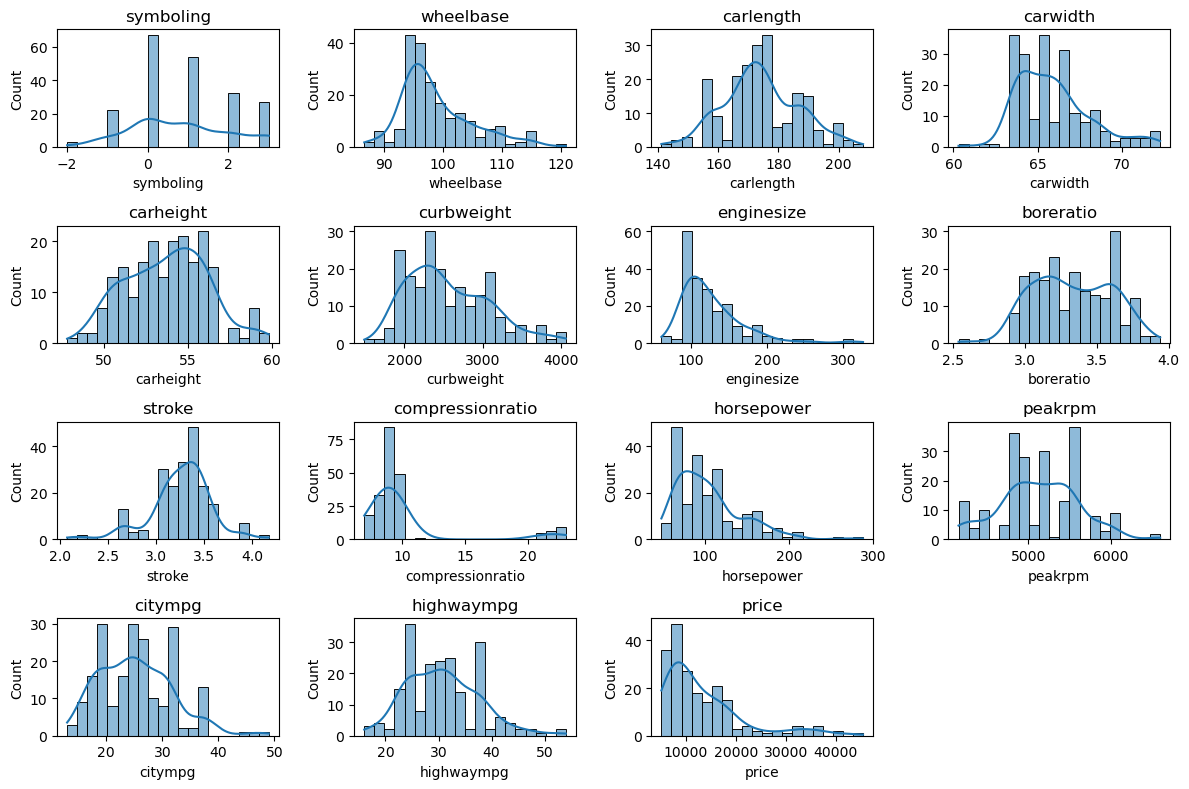

In [44]:
# check hist cols num
plt.figure(figsize=(12, 8))
for col in df_cols_num.drop('car_ID', axis = 1):
    plt.subplot(4, 4,  df_cols_num.columns.get_loc(col))
    sns.histplot(data=((df_cols_num[col])), bins = 20 , kde =True)
    plt.title(col)

plt.tight_layout()
plt.show()

#a = df_cols_num.drop('symboling', axis= 1)
#print(a.lt(0).sum())
#print(a.isin([0]).astype(int).sum())

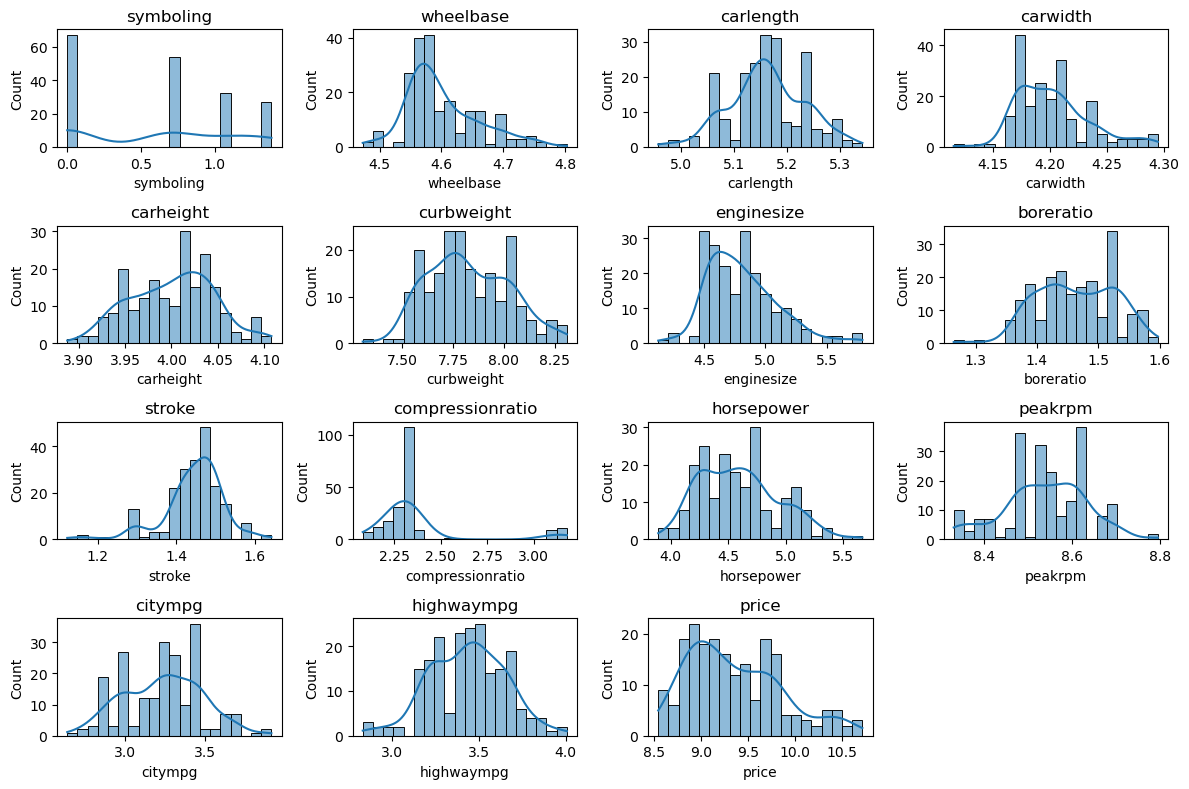

In [45]:
# check hist cols num
plt.figure(figsize=(12, 8))
for col in df_cols_num.drop('car_ID', axis = 1):
    plt.subplot(4, 4,  df_cols_num.columns.get_loc(col))
    sns.histplot(data=(np.log1p(df_cols_num[col])), bins = 20 , kde =True)
    plt.title(col)

plt.tight_layout()
plt.show()
    

In [46]:
pt_name = df_cols_num.drop(['car_ID','symboling','price'], axis= 1).columns
pt_name

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

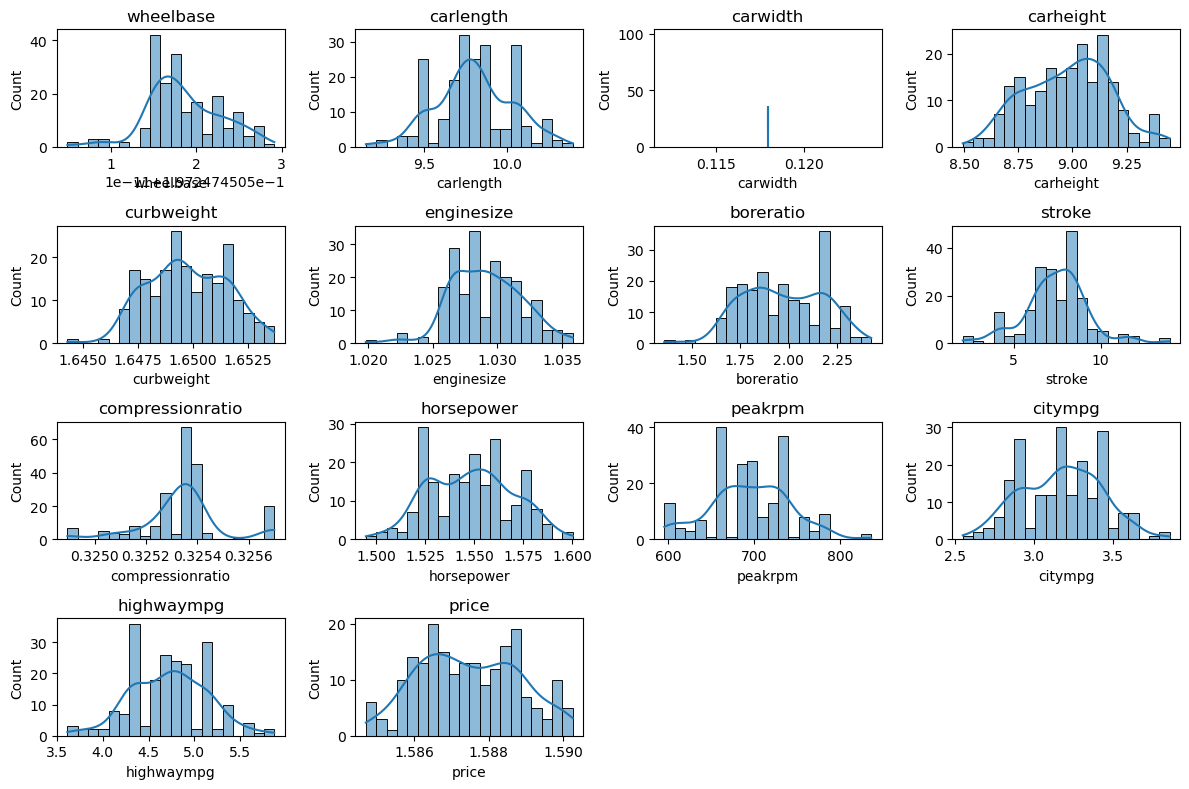

In [47]:
pt = PowerTransformer(method='box-cox',standardize=False)
test_pt = pt.fit_transform(df_cols_num.drop(['car_ID','symboling'], axis = 1))
test_pt = pd.DataFrame(test_pt)
test_pt.rename(columns = dict(zip(range(16), df_cols_num.drop(['car_ID','symboling'], axis = 1))),inplace = True)
#test_pt.hist(figsize=(15,10))
#test_pt.hist(figsize=(15, 10))
#df_feature.rename(columns = dict(zip(range(16), df_cols_num)),inplace = True)
plt.figure(figsize=(12, 8))
for col in test_pt:
    plt.subplot(4, 4,  test_pt.columns.get_loc(col)+1)
    sns.histplot(data=(test_pt[col]), bins = 20 , kde =True)
    plt.title(col)

plt.tight_layout()
plt.show()
plt.show()

In [48]:
# check unique count in cols cat
df_cols_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         205 non-null    object
 1   fueltype        205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


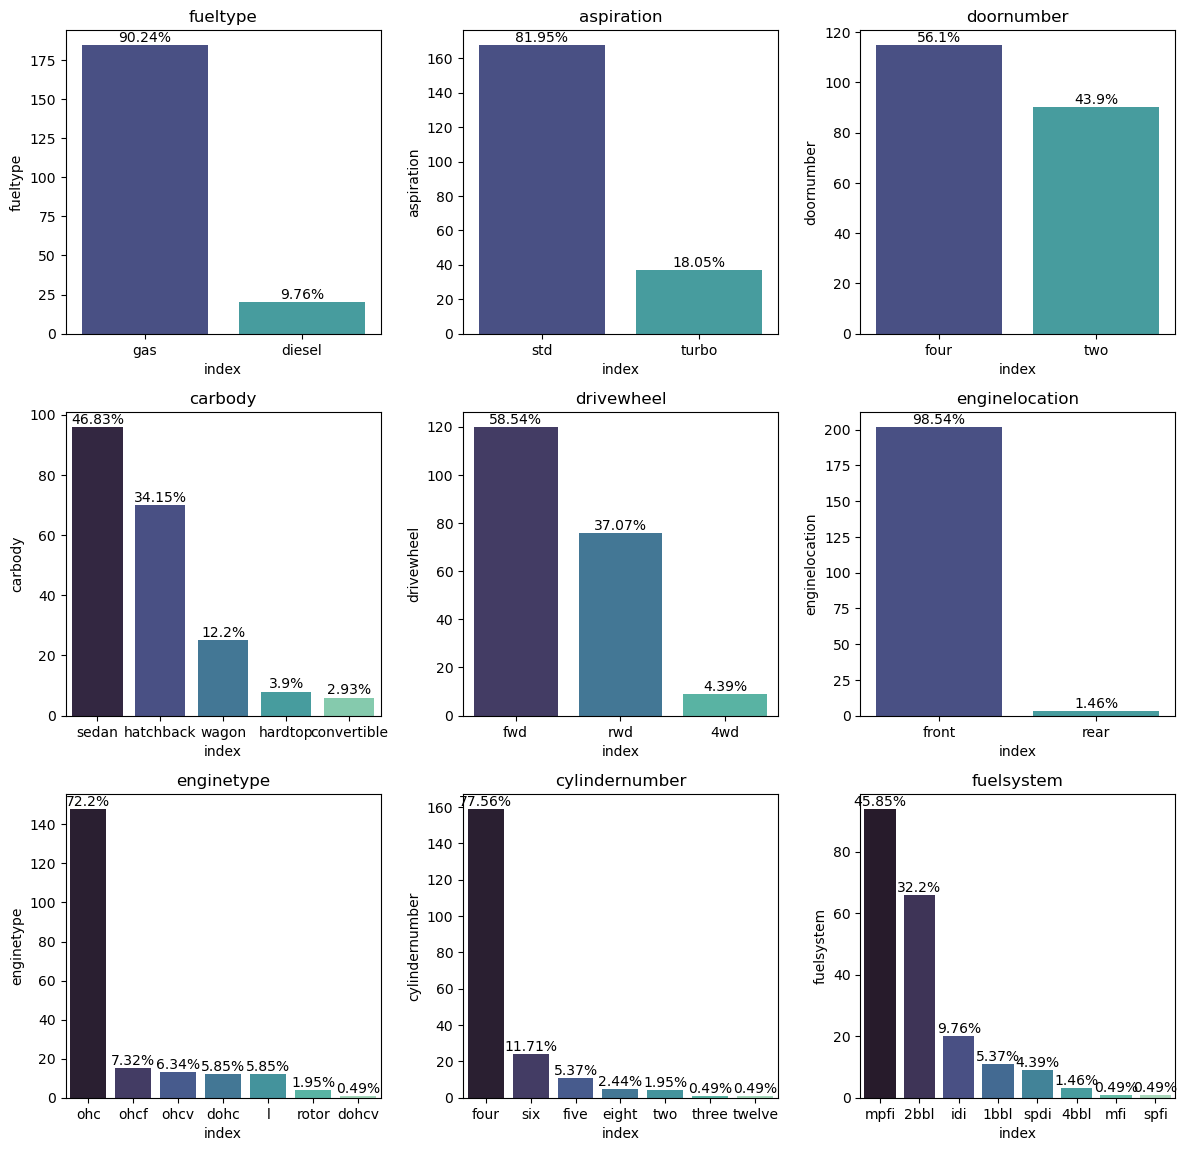

In [49]:
plt.figure(figsize=(12, 15))
for col in df_cols_cat.drop('CarName', axis = 1):
    cat_freq = df_cols_cat[col].value_counts().reset_index()
    plt.subplot(4, 3,  df_cols_cat.columns.get_loc(col))
    sns.barplot(data = cat_freq, x = 'index', y = col , palette= 'mako')
    
    # แสดงค่า count บนแท่ง
    for model, count in enumerate(cat_freq[col]):
        plt.text(model, count + 0.1, f'{round(count/cat_freq[col].values.sum()*100,2)}%', ha='center', va='bottom')
    
    plt.title(col)

plt.tight_layout()    
plt.show()

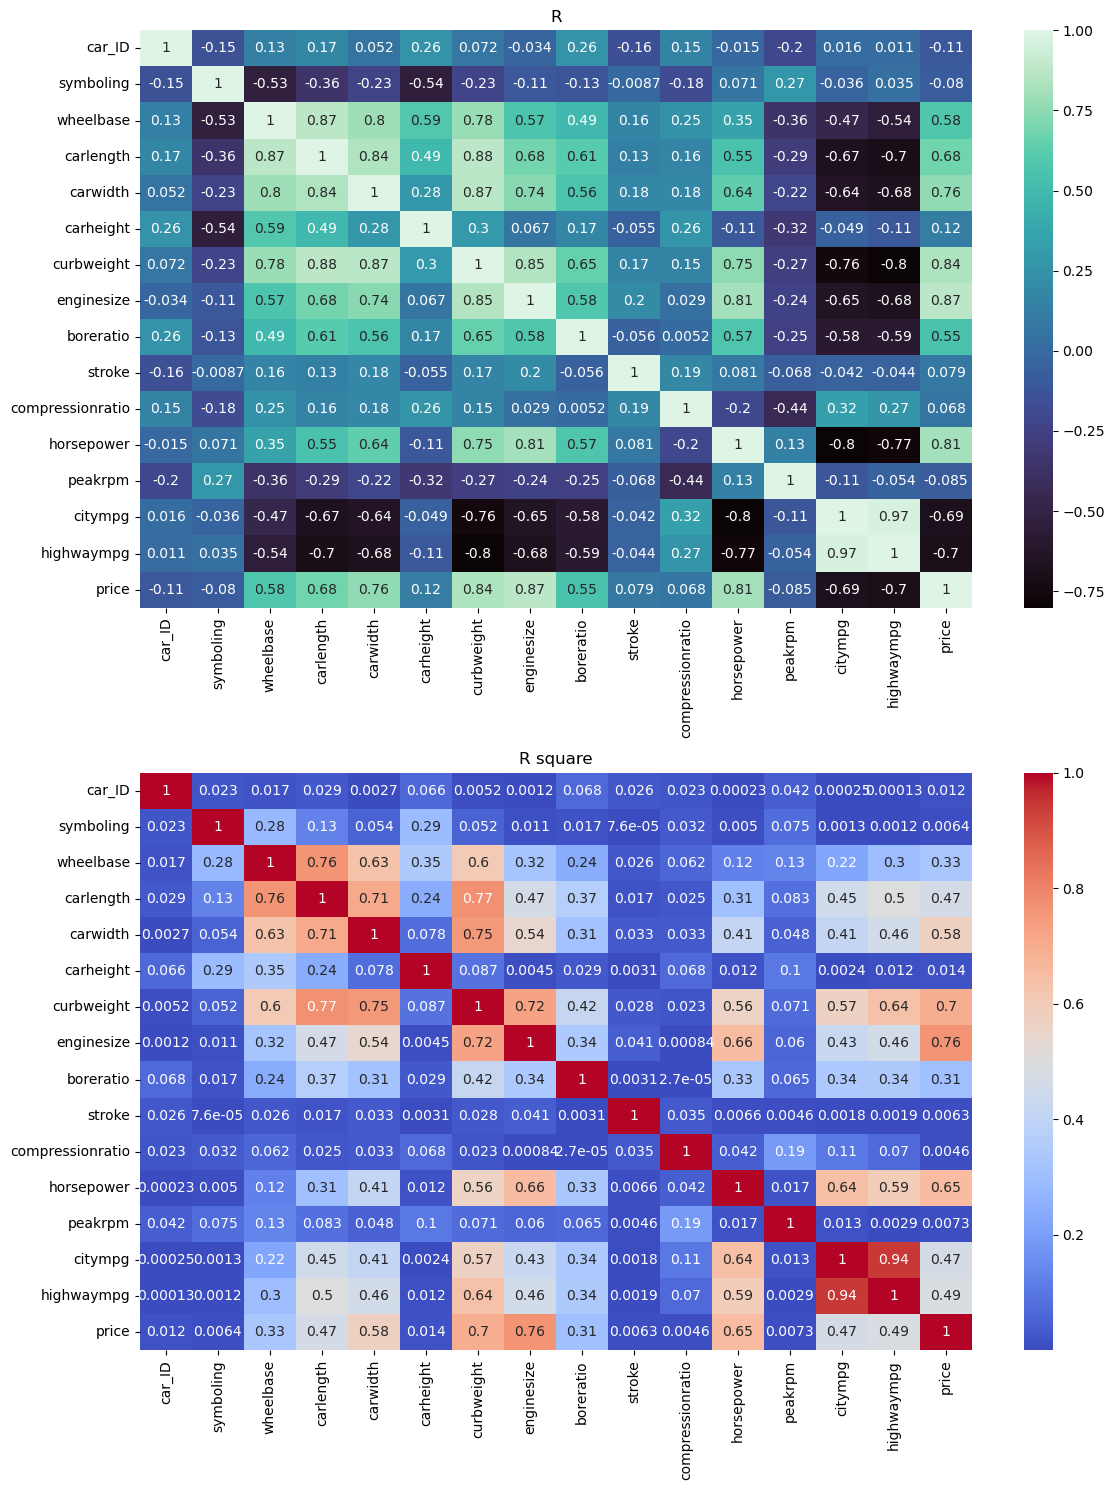

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))
sns.heatmap(df.corr()**2 , ax = axes[1], annot=True, cmap='coolwarm')
axes[1].set_title('R square')
sns.heatmap(df.corr() , ax = axes[0] , annot=True, cmap='mako')
axes[0].set_title('R')

plt.tight_layout()
plt.show()

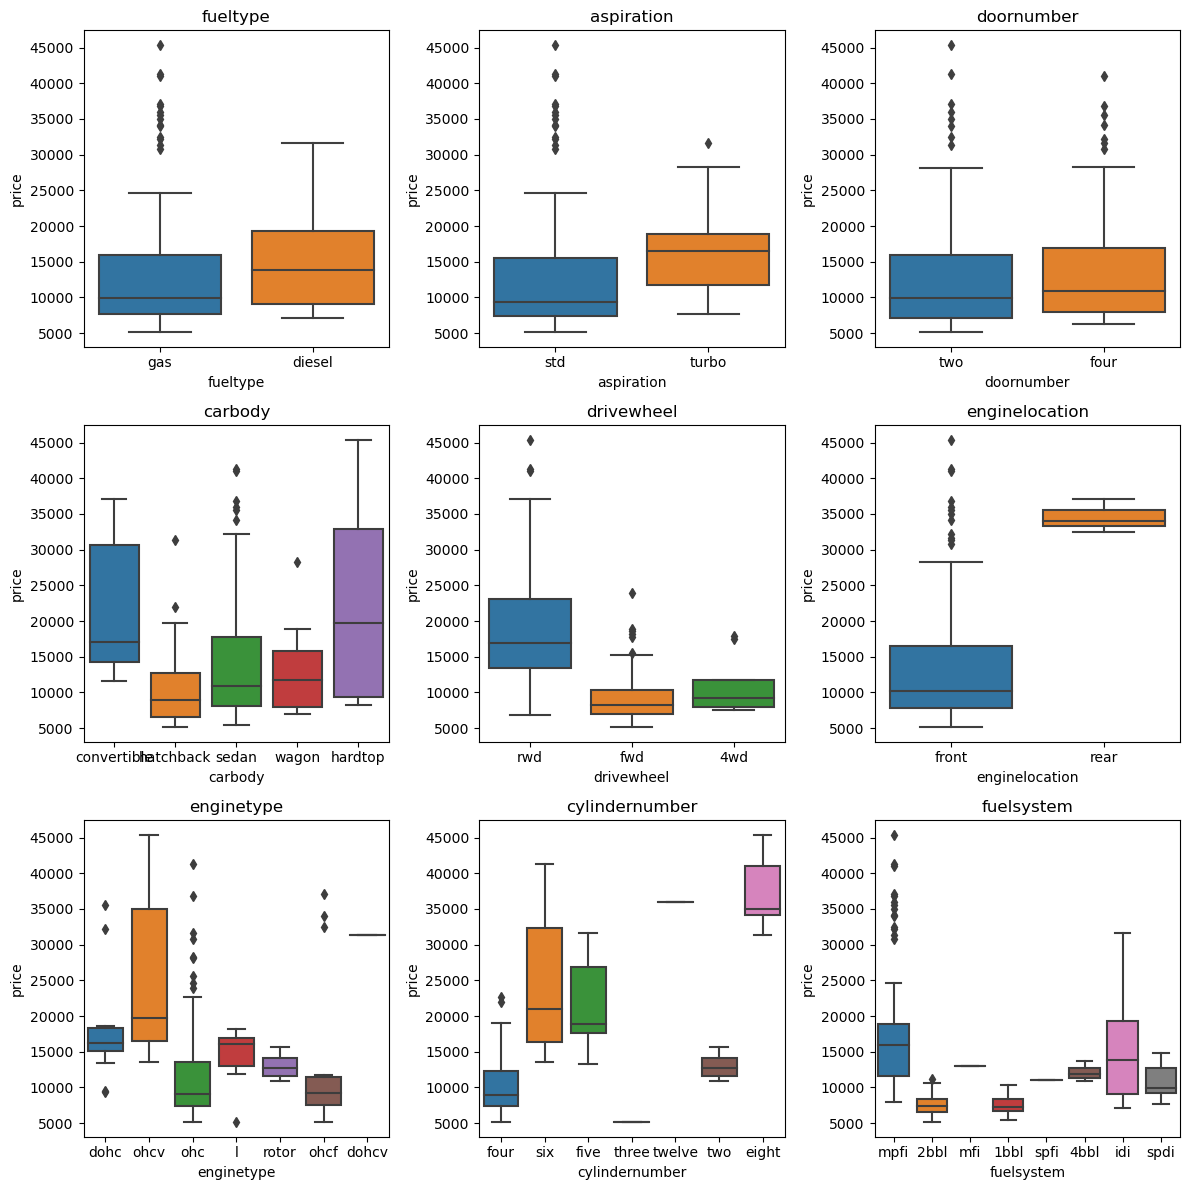

In [51]:
# ดูการกระจายตัวของราคา เทียบกับ cat ต่างๆ
plt.figure(figsize=(12, 12))
for col in df_cols_cat.drop('CarName', axis = 1):
    plt.subplot(3, 3,  df_cols_cat.columns.get_loc(col))
    sns.boxplot(x = df_cols_cat[col] , y = df['price'])
    plt.title(col)

plt.tight_layout()    
plt.show()



# summary from EDA
- price , enginesize , basewheel กราฟเป็นในรูปของการเบ้ขวา 
- คนกว่า 90% เลือกใช้ gas แต่เมื่อเทียบกับราคาพบว่า desel นั้นมีราคา median ที่สูงกว่า 
- รถเกือบทั้งหมดนั้น เลือกใช้เครื่องวางหน้า ถึง 98.54%
- รถในตลาดที่ติด turbo มีเพียง 18.05% แต่มีราคาสูงกว่า รถทั่วไป
- รถที่คนนิยมใช้ คือ sedan รองลงมาด้วย hatchback และนิยมน้อยที่สุดคือ convertible
-- ในส่วนราคา convertible , hardtop ที่ราคากลางที่สูงมากเมื่อเทียบกับ bodycar รุ่นอื่น
- ประเภทเครื่องยนต์ที่นิยมมากสุดคือ ohc ซึ่งมีสัดส่วนถึง 72.2% ในตลาด ต่างกับอันดับ 2 ที่เป็น ohcf 64.88%
- รถส่วนใหญ่นิยมใช้ ลูกสูบ 4 สูบซึ่งมีสัดส่วน ซึ่งมีสัดส่วนถึง 77.56% ในตลาด ต่างกับอันดับ 2 ที่เป็น ohcf 65.85%

# Prepare data for prediction

In [52]:
# Label encoder for cateogry column
label_encoders = {}

df_cols_cat_encoders = df_cols_cat.copy()
for col in df_cols_cat:
    label_encoders[col] = LabelEncoder()
    df_cols_cat_encoders[col] = label_encoders[col].fit_transform(df_cols_cat_encoders[col])
df_cols_cat_encoders

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5
201,138,1,1,0,3,2,0,3,2,5
202,140,1,0,0,3,2,0,5,3,5
203,142,0,1,0,3,2,0,3,3,3


In [53]:
df_cols_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [54]:
df_cols_prepro = pd.concat([df_cols_num ,df_cols_cat_encoders] , axis = 1)
df_cols_prepro

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,2,1,0,1,0,2,0,0,2,5
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,3,1,0,1,0,2,0,0,2,5
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,1,0,1,2,2,0,5,3,5
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,4,1,0,0,3,1,0,3,2,5
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,139,1,0,0,3,2,0,3,2,5
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,138,1,1,0,3,2,0,3,2,5
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,140,1,0,0,3,2,0,5,3,5
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,142,0,1,0,3,2,0,3,3,3


In [55]:
df_cols_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
 16  CarName           205 non-null    int32  
 1

In [56]:
#use Standardscaler
df_feature = df_cols_prepro.drop(columns=['price','car_ID','CarName'])
df_label = (df_cols_prepro.price)
df_label

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [57]:
#dict(zip(range(16), df_cols_num))

In [58]:
# df_feature.rename(columns={0:'car_ID',
#                            1:'symboling',
#                            2:'wheelbase',
#                            3:'carlength',
#                            4:'carwidth',
#                            5:'carheight',
#                            6:'curbweight',
#                            7:'enginesize',
#                            8:'boreratio',
#                            9:'stroke',
#                            10:'compressionratio',
#                            11:'horsepower',
#                            12:'peakrpm',
#                            13:'citympg',
#                            14:'highwaympg',
#                            15:'price'},
#                   inplace=True)

#df_feature.rename(columns = dict(zip(range(16), df_cols_num)),inplace = True)  ## แบบนี้แทน

In [77]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label , test_size=0.30, random_state=42)

# pt = PowerTransformer(method='box-cox',standardize=False)
# pt_name = df_cols_num.drop(['car_ID','symboling','price','carwidth'], axis = 1).columns
# X_train[pt_name] = pd.DataFrame(pt.fit_transform(X_train[pt_name]), columns=pt_name)
# X_test[pt_name] = pd.DataFrame(pt.transform(X_test[pt_name]), columns=pt_name)
# print(X_test[pt_name])
# plt.show()

log_name = ['wheelbase','enginesize','horsepower','citympg','compressionratio','highwaympg']
X_train[log_name] = np.log1p(X_train[log_name])
X_test[log_name] = np.log1p(X_test[log_name])

print(X_train.columns)
# pt_X_train.rename(columns = dict(zip(range(14), df_cols_num.drop(['car_ID','symboling','price'], axis = 1))),inplace = True)
# print(pt_X_train)
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)


#print(X_train)

#print("X Train Scaler : ", X_train.shape)
#print("X Test Scaler : ", X_test.shape)
#print("Y Train Scaler : ", y_train.shape)
#print("Y Test  Scaler : ", y_test.shape)

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


In [92]:
# make for loop for Regression 
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),MLPRegressor(),SVR(),XGBRegressor()]
q = {}
for model in models:
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    # ดึงชื่อคลาสของแบบจำลอง
    model_name = type(model).__name__
    print(model_name,":",r2_score(y_test,ypred)*100)
    q.update({model_name:model.score(X_test,y_test)*100})

LinearRegression : 75.75026471341624
DecisionTreeRegressor : 87.41393070567264
RandomForestRegressor : 94.5033214209307
KNeighborsRegressor : 70.5984167359249
MLPRegressor : -241.1643959340066
SVR : -6.634198815130277
XGBRegressor : 91.88814687710584


# summary 
- RandomForestRegressor เป็น model ที่ทำนายข้อมูลได้แม่นยำมากที่สุด โดย r square อยู่ที่ 94-95 %
    รองลงมาเป็น XGBRegressor model ได้ R squared อยู่ที่ 91.88 %

In [61]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [62]:
len(X_train[0])

23

Text(0.5, 1.0, 'Feature Importance - Predict Price')

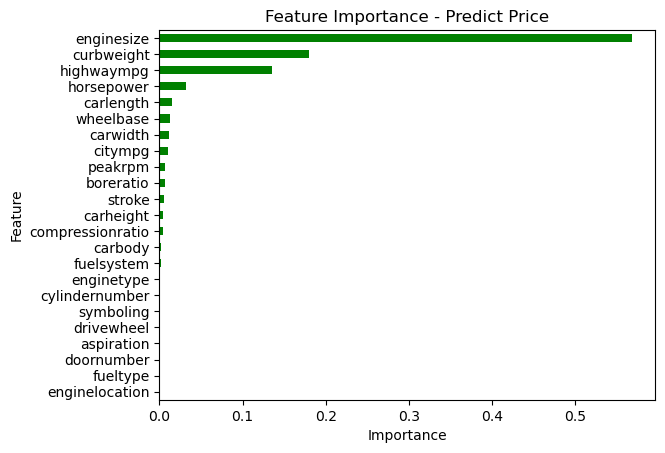

In [63]:
global_importances = pd.Series(model.feature_importances_ , index = df_feature.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Predict Price")

In [64]:
df_preview = pd.DataFrame({'Price_predict' : y_pred,
                           'Real_price' : y_test})
print('this price is log transformed')
df_preview.round(2)

this price is log transformed


,Price_predict,Real_price
15,35348.50,30760.00
9,18726.33,17859.17
100,9080.92,9549.00
132,13610.80,11850.00
68,27240.30,28248.00
...,...,...
56,13417.61,11845.00
128,32903.86,37028.00
76,5880.75,5389.00
144,11064.86,9233.00
